# Covid-19

Three months ago, reports surfaced out of China that a cluster of pneumonia cases in the central city of Wuhan may be due to a new type of coronavirus.

The World Health Organization said at the time it was still assessing the extent of the outbreak, but noted there were no reports of novel coronavirus outside Wuhan.

Since then, the situation has changed drastically.

More than 1.6 million people have been infected across the globe, more than 100,000 have died and lockdowns have been ordered in numerous counties. The majority of the states in the U.S. have also adopted some sort of shelter-in-place order.

The whole world has come to a stand still.

## Problem Statement:
- Find the worldwide trends
- Country wise rate of increase in cases
- Highest recovery rate country wise
- Highest death rate country wise
- Predicting trend

### I'll start by getting a rough look at the data to get a sort of overview

In [51]:
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('covid_19_data.csv')

In [3]:
dataset.shape

(12889, 8)

In [4]:
dataset.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [5]:
dataset.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     6202
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

#### Even though 50% of the data is missing in 'Province/State' I will not be dropping it as you'll see below it can still be used for some analysis

In [6]:
dataset.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


First convert the 'ObservationDate' column to datetime

In [7]:
dataset['ObservationDate'] = pd.to_datetime(dataset['ObservationDate'])
dataset['Last Update'] = pd.to_datetime(dataset['Last Update'])

# Exploratory Data Analysis

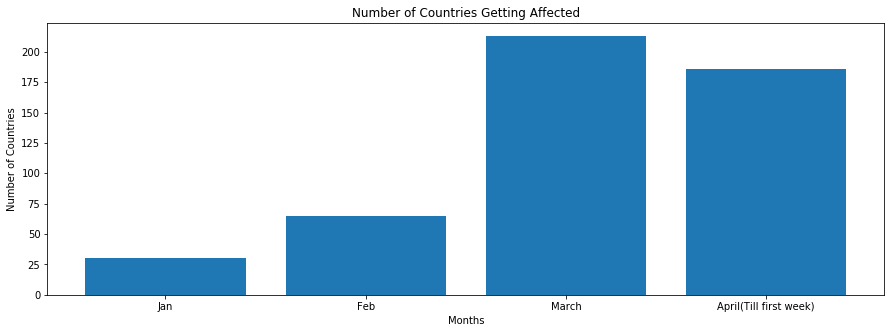

In [222]:
months = ['Jan','Feb','March','April(Till first week)']
countries_affected = []
for x in range(1,5):
    countries_affected.append(dataset[dataset['ObservationDate'].dt.month == x]['Country/Region'].nunique())
plt.figure(figsize = (15,5))    
plt.bar(months,countries_affected)    
plt.xlabel('Months')
plt.ylabel("Number of Countries")
plt.title('Number of Countries Getting Affected')
plt.show()

# Top Ten Most Affected Countries

In [13]:
first_month = dataset[dataset['ObservationDate'] == '01/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [14]:
second_month = dataset[dataset['ObservationDate'] == '02/29/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [15]:
third_month = dataset[dataset['ObservationDate'] == '03/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

In [16]:
fourth_month = dataset[dataset['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False).head(10)

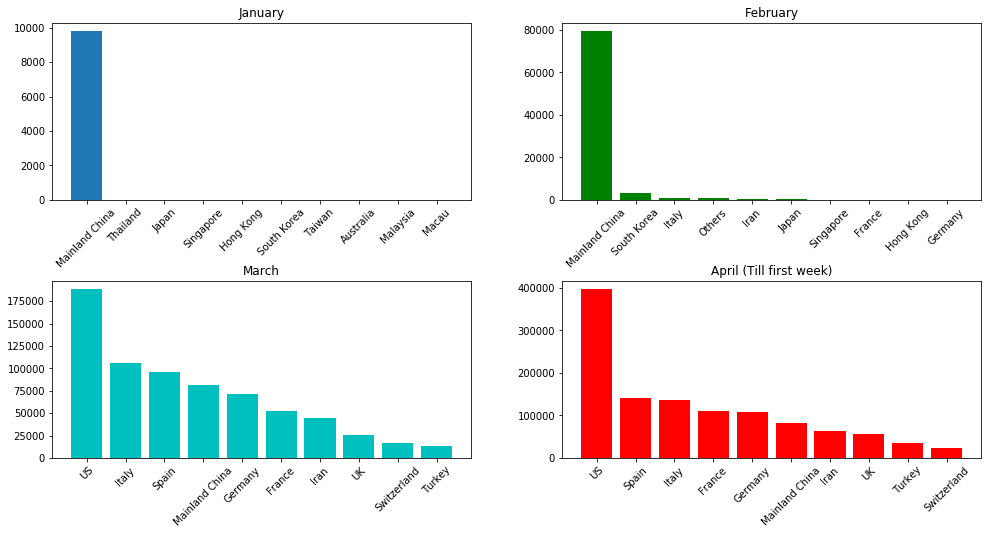

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
fig.tight_layout(pad=6.0)

ax[0,0].bar(first_month.index.tolist(),first_month.tolist())
ax[0,0].set_xticklabels(first_month.index.tolist(),rotation = 45, minor=False)
ax[0,0].title.set_text('January')

ax[0,1].bar(second_month.index.tolist(),second_month.tolist(), color = 'g')
ax[0,1].set_xticklabels(second_month.index.tolist(),rotation = 45, minor=False)
ax[0,1].title.set_text('February')

ax[1,0].bar(third_month.index.tolist(),third_month.tolist(), color = 'c')
ax[1,0].set_xticklabels(third_month.index.tolist(),rotation = 45, minor=False)
ax[1,0].title.set_text('March')

ax[1,1].bar(fourth_month.index.tolist(),fourth_month.tolist(), color = 'r')
ax[1,1].set_xticklabels(fourth_month.index.tolist(),rotation = 45, minor=False)
ax[1,1].title.set_text('April (Till first week)')

plt.show()


### <font color = 'green'> The top ten most affected countries right now are US, Spain, Italy, France, Germany, China, Iran, UK, Turkey and Switzerland </font>

# Top 10 Countries with highest rate of confirmed cases (From above countries)

In [20]:
top_countries = fourth_month.index.tolist()
increase_rate = {}
for x in top_countries:
        increase_rate.update({x:((fourth_month_total[x] - third_month_total[x] )/ third_month_total[x]) * 100})
increase_rate = pd.DataFrame({'Countries':list(increase_rate.keys()), 'Increase Rate': list(increase_rate.values())})
increase_rate = increase_rate.sort_values(by = 'Increase Rate',ascending = False).head(10)

In [21]:
increase_rate

,Countries,Increase Rate
8,Turkey,152.080408
7,UK,119.571445
0,US,110.564271
3,France,108.349897
4,Germany,49.931762
1,Spain,47.974938
6,Iran,40.318350
9,Switzerland,34.013851
2,Italy,28.162810
5,Mainland China,0.263726


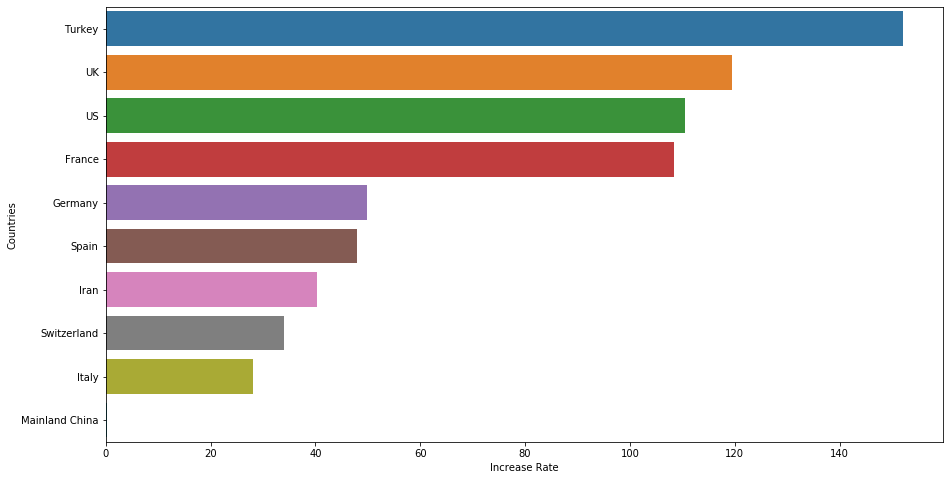

In [22]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Increase Rate', y = 'Countries', data = increase_rate)
plt.show()

The number of cases in Turkey has increased by 150% from the previous month followed by UK at 120%

# Top 10 Countries with the highest rate of increase in cases (Overall)

In [19]:
third_month_total = dataset[dataset['ObservationDate'] == '03/31/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False)
fourth_month_total = dataset[dataset['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False)

In [23]:
countries_overall = dataset['Country/Region'].tolist()
increase_rate_overall = {}
for x in countries_overall:
    if (x not in third_month_total or x not in fourth_month_total):
        continue;
    else:
        increase_rate_overall.update({x:((fourth_month_total[x] - third_month_total[x] )/ third_month_total[x]) * 100})
increase_rate_overall = pd.DataFrame({'Countries':list(increase_rate_overall.keys()), 'Increase Rate': list(increase_rate_overall.values())})
increase_rate_overall = increase_rate_overall.sort_values(by = 'Increase Rate',ascending = False).head(10)

In [24]:
increase_rate_overall

,Countries,Increase Rate
157,Niger,929.629630
132,Saint Vincent and the Grenadines,700.000000
117,Guinea,554.545455
181,Sierra Leone,500.000000
55,Belarus,466.447368
140,Liberia,366.666667
178,MS Zaandam,350.000000
173,Guinea-Bissau,312.500000
25,India,280.171797
24,United Arab Emirates,255.271084


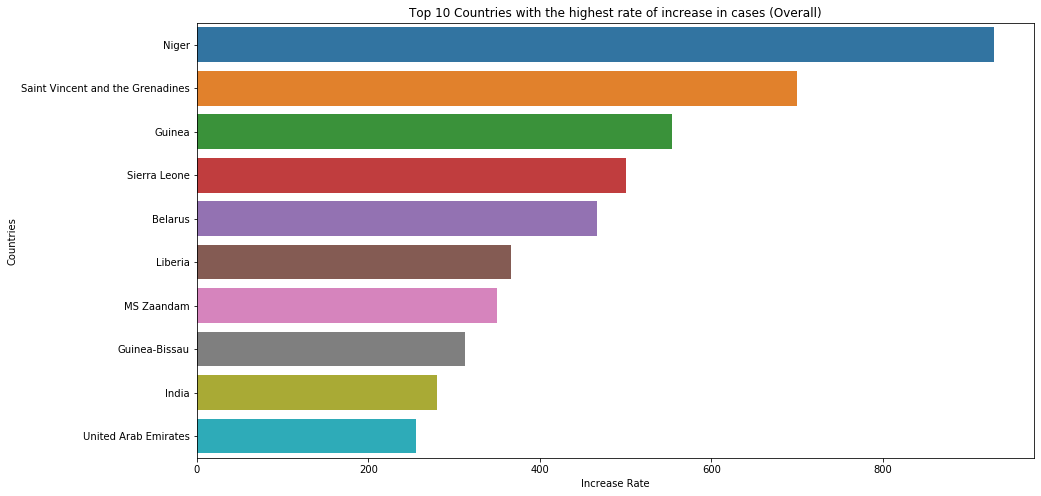

In [217]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Increase Rate', y = 'Countries', data = increase_rate_overall)
plt.title('Top 10 Countries with the highest rate of increase in cases (Overall)')
plt.show()

### <font color = 'green'> Even though the total number of confirmed cases in these countries isn't that high they are showing a much higher rate of increase in cases as compared to the previous month (March) </font>

# Most Affected States in US

In [26]:
april = dataset[dataset['ObservationDate'] == '04/07/2020']
us_cities_april = april[april['Country/Region'] == 'US'][['Province/State','Confirmed']].sort_values(by = 'Confirmed', ascending = False).head(10)

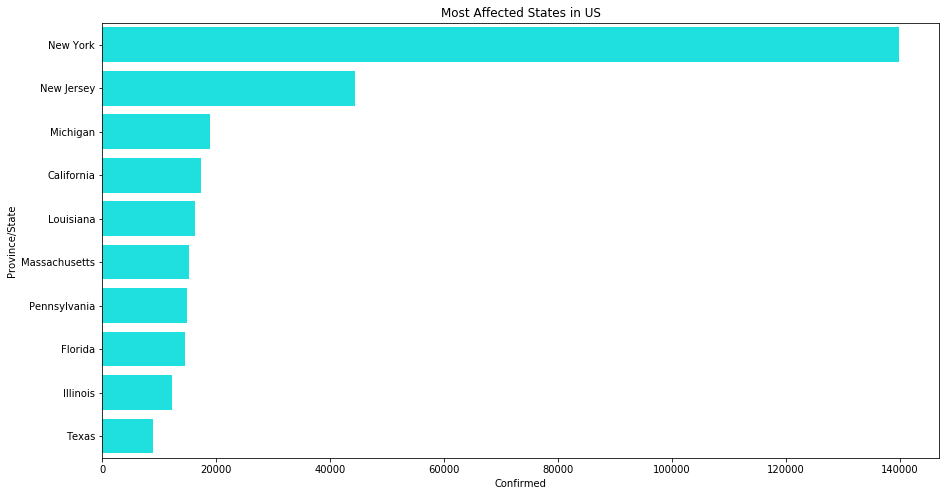

In [27]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Confirmed', y = 'Province/State', data = us_cities_april, color = 'cyan')
plt.title('Most Affected States in US')
plt.show()

In [207]:
us_dataset = dataset[dataset['Country/Region'] == 'US']
#Dropping these four days as cases were taken for Counties as opposed to the other days where cases were taken for States
us_dataset = us_dataset[(us_dataset['ObservationDate'] != '2020-03-06') & (us_dataset['ObservationDate'] != '2020-03-07') & (us_dataset['ObservationDate'] != '2020-03-08') & (us_dataset['ObservationDate'] != '2020-03-09')]

In [210]:
number_of_cities = us_dataset.groupby(['ObservationDate']).size()

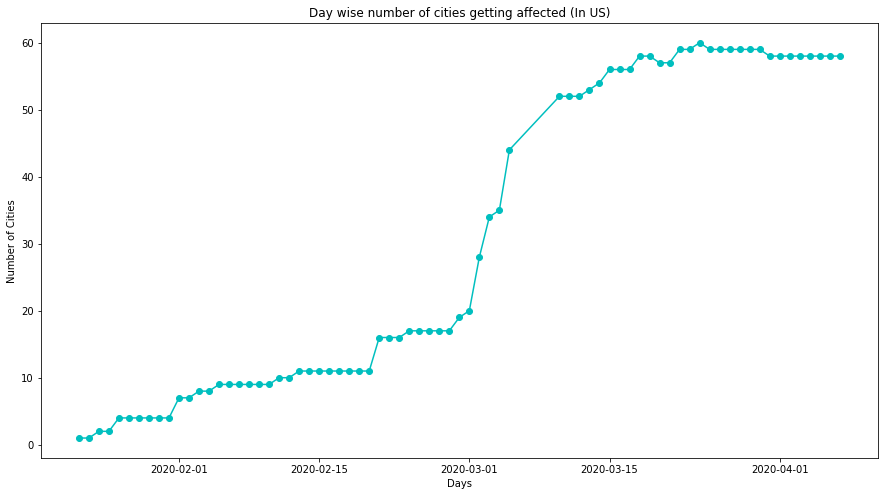

In [215]:
plt.figure(figsize = (15,8))
plt.plot(number_of_cities, color = 'c', marker = 'o')
plt.title('Day wise number of cities getting affected (In US)')
plt.xlabel('Days')
plt.ylabel('Number of Cities')
plt.show()

# Top Ten Countries with Highest Recovery rate

In [121]:
fourth_month_recovery = dataset[dataset['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Recovered'].sum().sort_values(ascending = False)

In [122]:
for x in fourth_month_recovery.index.tolist():
    ratio = (fourth_month_recovery[x]/fourth_month_total[x]) * 100
    fourth_month_recovery[x] = ratio   
fourth_month_recovery = fourth_month_recovery.sort_values(ascending = False).head(10)    

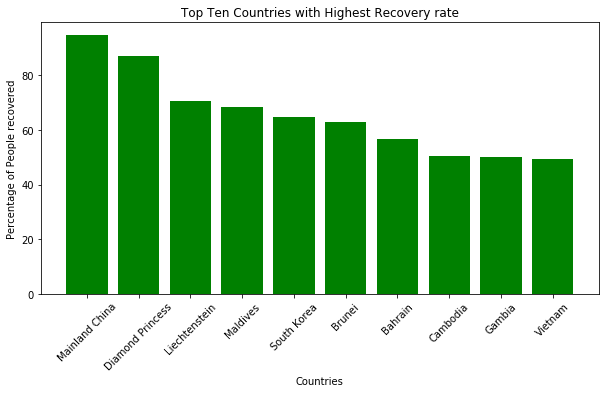

In [218]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Countries')
plt.ylabel('Percentage of People recovered')
plt.title('Top Ten Countries with Highest Recovery rate')
plt.bar(fourth_month_recovery.index.tolist(), fourth_month_recovery.tolist(),color = 'g',)
plt.show()

# Top Ten Countries with Highest Death rate

In [115]:
fourth_month_deaths = dataset[dataset['ObservationDate'] == '04/07/2020'].groupby(['Country/Region'])['Deaths'].sum().sort_values(ascending = False)

In [116]:
for x in fourth_month_deaths.index.tolist():
    ratio = (fourth_month_deaths[x]/fourth_month_total[x]) * 100
    fourth_month_deaths[x] = ratio   

In [117]:
fourth_month_deaths = fourth_month_deaths.sort_values(ascending= False).head(10)

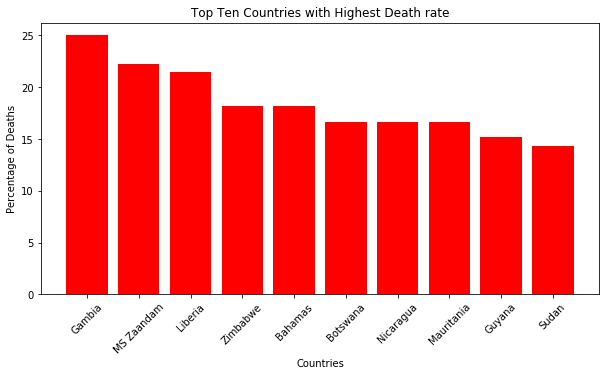

In [221]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Countries')
plt.ylabel('Percentage of Deaths')
plt.title('Top Ten Countries with Highest Death rate')
plt.bar(fourth_month_deaths.index.tolist(), fourth_month_deaths.tolist(),color = 'r',)
plt.show()

# Covid-19 Analysis of India

In [135]:
ind_confirmed = dataset[dataset['Country/Region'] == 'India'].groupby(['ObservationDate'])['Confirmed'].sum().tolist()
ind_recovered = dataset[dataset['Country/Region'] == 'India'].groupby(['ObservationDate'])['Recovered'].sum().tolist()
ind_deaths = dataset[dataset['Country/Region'] == 'India'].groupby(['ObservationDate'])['Deaths'].sum().tolist()

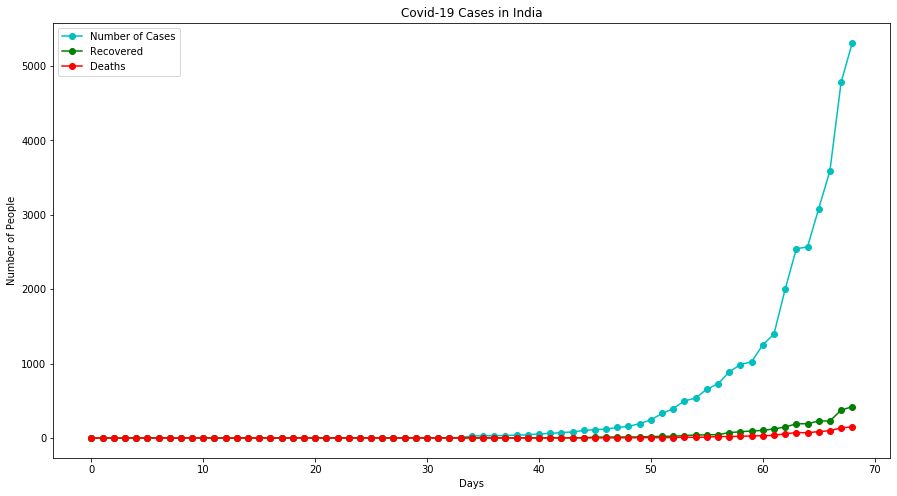

In [220]:
plt.figure(figsize = (15,8))
plt.plot(ind_confirmed, color = 'c', marker = 'o', label = 'Number of Cases')
plt.plot(ind_recovered, color = 'g', marker = 'o', label = 'Recovered')
plt.plot(ind_deaths, color = 'r', marker = 'o', label = 'Deaths')
plt.title('Covid-19 Cases in India')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.legend()
plt.show()

# Forecasting using RNN

The reason I went with RNN for Time Series prediction instead of ARIMA is because ARIMA models are basically linear models, so they can only work if the relation is linear whereas LSTMs are better at identifying complex pattern logics from data by "remembering what's useful and discarding what's not"

In [44]:
dataset_rnn = dataset.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [45]:
dataset_rnn

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
2020-01-27,2927.0,61.0,82.0
2020-01-28,5578.0,107.0,131.0
2020-01-29,6165.0,126.0,133.0
2020-01-30,8235.0,143.0,171.0


In [47]:
dataset_rnn.shape

(77, 3)

In [85]:
training_set = dataset_rnn.iloc[:,0:1].values

#Date Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#Creating data structure with 45 timesteps 
X_train = []
y_train = []
for i in range(45, 60):
    X_train.append(training_set_scaled[i-45:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)   

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Initialize the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

#Add first LSTM layer and Dropout regularisation
regressor.add(LSTM(units =50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding third layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding fourth layer
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mse')

#Training the model
#Taking a small batch size because the number of data points to train on is limited
regressor.fit(X_train, y_train, epochs = 50, batch_size = 5)

Epoch 1/50
15/15 [==============================] - 1s 97ms/step - loss: 0.0111
Epoch 2/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0030
Epoch 3/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0030
Epoch 4/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0019
Epoch 5/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0020
Epoch 6/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0021
Epoch 7/50
15/15 [==============================] - 0s 28ms/step - loss: 0.0018
Epoch 8/50
15/15 [==============================] - 0s 28ms/step - loss: 0.0023
Epoch 9/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0018
Epoch 10/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0020
Epoch 11/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0019
Epoch 12/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0016
Epoch 13/50
15/15 [==================

In [86]:
#Prediction and visualization
real_confirmed_cases = dataset_rnn.iloc[57:77,0:1].values

X_test = []

for i in range(57,77):
    X_test.append(training_set_scaled[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)

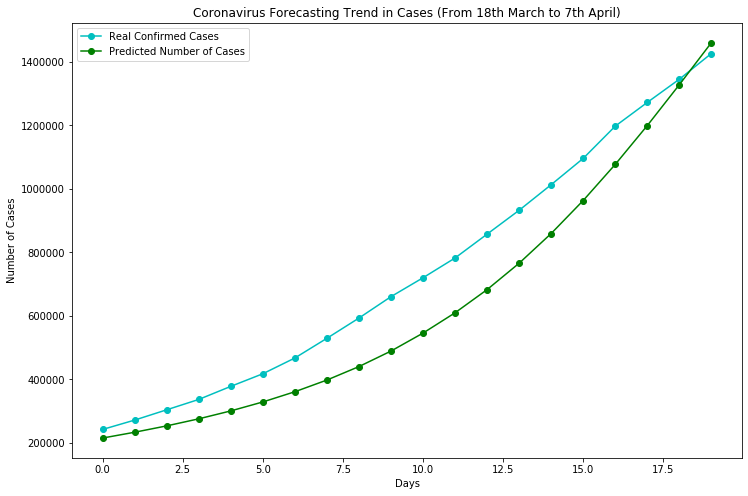

In [94]:
plt.figure(figsize = (12,8))
plt.plot(real_confirmed_cases, color='c',marker = 'o', label = 'Real Confirmed Cases')
plt.plot(predicted_confirmed_cases, color='g',marker = 'o', label = 'Predicted Number of Cases')
plt.title('Coronavirus Forecasting Trend in Cases (From 18th March to 7th April)')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

### <font color = 'green'>The RNN model is forecasting an exponential trend in the number of covid-19 cases which is quite simliar to the Real number of cases. So the model is performing pretty well considering the limited amount of days to train the model on(3 months of data). </font>

# Conclusion:

Yesterday US suffered 2000 deaths which is the highest number of deaths for any country on a single day. Even though Italy has one of the best healthcare system in the world it has still been pushed to it's limit with over 100k confirmed cases and almost 2000 deaths every week.The number of cases have been growing at an exponential rate but few countries have seen a decline in this trend by following a strict lockdown. The only way people can combat this is by taking this pandemic seriously and following all the safety precautions such as maintaining social distancing and staying quaratined.

I have just begun my journey to become a Data Scientist and have still got a lot to learn. Will appreciate any kind of feedback or criticism. There is still a lot of things I could have tried with this dataset. Will surely come back and try to improve on this work.

Thank You

## Stay Healthy Stay Safe guys